To do:
Explain project process Mention small dataset

## Intro

The deadly coronavirus has caused many governors in the United States to issue stay-at-home orders. Stay-at-home orders allow the government issuing one to restrict the movement of the people in that area. While these orders cause a negative economic impact and restrict the rights of citizens, they are necessary in some cases to control an epidemic or pandemic. Stay at home orders are up to the states issuing them, and can be issued and revoked at their will, as long as the order serves a "compelling government interest". I want to create a model that analyzes newspaper articles and creates an estimate for when a stay-at-home order might come into place. 

## Project Usefulness

If people and companies had an estimate of when a stay-at-home order would be coming, they would be much more able to prepare for the impacts of them. Companies could decide on if they can have people work remotely and how to go about doing that.

## Loading the data

The data can be found [here](https://github.com/StevenBNYC/Barlatier-Steven-Thinkful/blob/master/FinalCapstoneData.ipynb).

In [1]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from plotly.offline import init_notebook_mode, iplot
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import cufflinks as cf
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import re
import scipy
import seaborn as sns
import sklearn
import string
import textstat
%matplotlib inline

In [2]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
df = pd.read_pickle("../Data/concatenated.pkl") 

## Data cleaning

In [4]:
df.reset_index(drop=True, inplace=True)

In [5]:
pd.set_option('display.max_colwidth', -1)

In [6]:
Sum = df.isnull().sum()
Percentage = (df.isnull().sum()/df.isnull().count()*100)

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
Article_Title,0,0.0
Article_Text,0,0.0
Time_Until_Order,0,0.0


In [7]:
df['dale_chall_score']=df['Article_Text'].apply(lambda x: textstat.dale_chall_readability_score(x))

In [8]:
df['polarity']=df['Article_Text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [9]:
df

Article_Title  \
0    Everything you need to know to get through the COVID-19 pandemic in California   
1    California K-12 schools prepare for coronavirus-related closures                 
2    California Reports First Coronavirus Death in Placer County                      
3    California Reports First Coronavirus Death as Symptoms Swirl on Cruise Ship      
4    California Declares Emergency After 1st Coronavirus Death                        
..                                                         ...                        
145  Health officials outline plans for possible coronavirus spread in Pennsylvania   
146  PA-native’s family ripped apart by coronavirus                                   
147  Coronavirus quarantine: A Pennsylvania man's day-by-day account                  
148  Coronavirus test expected to be available in Pa. by end of week                  
149  PA Preparing For Coronavirus Outbreak After Dire CDC Warning                     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [10]:
df["Article_Text"] = df['Article_Text'].str.replace('[^\w\s]','')

In [11]:
df

Article_Title  \
0    Everything you need to know to get through the COVID-19 pandemic in California   
1    California K-12 schools prepare for coronavirus-related closures                 
2    California Reports First Coronavirus Death in Placer County                      
3    California Reports First Coronavirus Death as Symptoms Swirl on Cruise Ship      
4    California Declares Emergency After 1st Coronavirus Death                        
..                                                         ...                        
145  Health officials outline plans for possible coronavirus spread in Pennsylvania   
146  PA-native’s family ripped apart by coronavirus                                   
147  Coronavirus quarantine: A Pennsylvania man's day-by-day account                  
148  Coronavirus test expected to be available in Pa. by end of week                  
149  PA Preparing For Coronavirus Outbreak After Dire CDC Warning                     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [12]:
tokenizer = RegexpTokenizer(r'\w+')

In [13]:
df["Article_Text"] = df['Article_Text'].apply(lambda x: tokenizer.tokenize(x.lower()))
df

,Article_Title,Article_Text,Time_Until_Order,dale_chall_score,polarity
0,Everything you need to know to get through the COVID-19 pandemic in California,"[gov, gavin, newsom, has, laid, out, six, benchmarks, to, help, gauge, how, the, state, will, move, through, the, four, phases, of, reopening, 1, testing, advertisement, the, governor, says, the, state, needs, the, ability, to, test, trace, contacts, and, isolate, and, support, people, who, have, the, virus, or, have, been, exposed, the, facts, state, benchmarks, werent, met, before, california, started, reopening, now, california, is, scaling, back, its, testing, task, force, despite, continued, long, lines, and, delayed, test, results, and, in, la, county, contact, tracing, has, failed, to, detect, major, outbreaks, at, workplaces, orange, county, has, also, struggled, antibody, tests, have, few, ...]",Less than Two Weeks,8.98,0.080029
1,California K-12 schools prepare for coronavirus-related closures,"[photo, julie, leopoedsource, photo, julie, leopoedsource, gov, gavin, newsom, declared, a, state, of, emergency, on, wednesday, after, an, elderly, patient, in, placer, county, near, sacramento, died, from, the, coronavirus, the, latest, developments, heighten, the, urgency, for, education, leaders, in, california, who, have, been, exploring, how, to, continue, instruction, in, case, of, an, outbreak, no, california, children, have, been, diagnosed, with, the, virus, a, respiratory, illness, that, began, with, an, outbreak, in, wuhan, china, risk, is, still, low, across, the, state, california, health, officials, said, on, wednesday, and, it, is, believed, to, be, higher, for, older, adults, and, persons, with, underlying, ...]",Less than Two Weeks,8.43,0.110171
2,California Reports First Coronavirus Death in Placer County,"[californias, first, coronavirus, fatality, an, elderly, patient, who, apparently, contracted, the, illness, on, a, cruise, prompted, the, governor, wednesday, to, declare, a, statewide, emergency, the, measure, made, california, the, third, us, state, to, declare, a, state, of, emergency, washington, and, florida, are, the, other, two, the, state, currently, has, 53, confirmed, cases, of, coronavirus, including, three, new, cases, announced, wednesday, in, santa, clara, county, and, a, medical, screener, at, los, angeles, international, airport, gov, gavin, newsom, said, the, emergency, proclamation, is, intended, to, help, procure, supplies, and, resources, quickly, he, announced, the, move, wednesday, afternoon, during, a, news, conference, hours, ...]",Less than Two Weeks,9.30,0.129327
3,California Reports First Coronavirus Death as Symptoms Swirl on Cruise Ship,"[three, more, cases, in, santa, clara, county, were, also, announced, and, the, many, developments, represented, a, significant, escalation, of, the, situation, in, california, which, has, had, at, least, 54, cases, of, the, virus, the, most, of, any, state, officials, in, los, angeles, county, with, 10, million, residents, the, largest, county, in, the, nation, declared, a, state, of, emergency, warning, that, the, number, of, confirmed, cases, was, likely, to, rise, this, is, a, call, for, preparedness, dr, barbara, ferrer, the, director, of, the, los, angeles, county, department, of, public, health, said, at, a, news, conference, on, wednesday, know, what, you, might, ...]",Less than Two Weeks,7.96,0.052511
4,California Declares Emergency After 1st Coronavirus Death,"[californias, first, coronavirus, fatality, an, elderly, patient, who, apparently, contracted, the, illness, on, a, cruise, prompted, the, governor, wednesday, to, declare, a, statewide, emergency, as, six, new, cases, including, a, medical, screener, at, los, angeles, international, airport, were, confirmed, the, measure, made, california, the, third, us, state, to, declare, a, state, of, emergency, washington, and, florida, are, the, other, two, the, state, currently, has, 53, confirmed, cases, of, coronavirus, gov, gavin, ne

In [14]:
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = ([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [15]:
df["Article_Text"] = df['Article_Text'].apply(lambda x: word_lemmatizer(x))
df

,Article_Title,Article_Text,Time_Until_Order,dale_chall_score,polarity
0,Everything you need to know to get through the COVID-19 pandemic in California,"[gov, gavin, newsom, ha, laid, out, six, benchmark, to, help, gauge, how, the, state, will, move, through, the, four, phase, of, reopening, 1, testing, advertisement, the, governor, say, the, state, need, the, ability, to, test, trace, contact, and, isolate, and, support, people, who, have, the, virus, or, have, been, exposed, the, fact, state, benchmark, werent, met, before, california, started, reopening, now, california, is, scaling, back, it, testing, task, force, despite, continued, long, line, and, delayed, test, result, and, in, la, county, contact, tracing, ha, failed, to, detect, major, outbreak, at, workplace, orange, county, ha, also, struggled, antibody, test, have, few, ...]",Less than Two Weeks,8.98,0.080029
1,California K-12 schools prepare for coronavirus-related closures,"[photo, julie, leopoedsource, photo, julie, leopoedsource, gov, gavin, newsom, declared, a, state, of, emergency, on, wednesday, after, an, elderly, patient, in, placer, county, near, sacramento, died, from, the, coronavirus, the, latest, development, heighten, the, urgency, for, education, leader, in, california, who, have, been, exploring, how, to, continue, instruction, in, case, of, an, outbreak, no, california, child, have, been, diagnosed, with, the, virus, a, respiratory, illness, that, began, with, an, outbreak, in, wuhan, china, risk, is, still, low, across, the, state, california, health, official, said, on, wednesday, and, it, is, believed, to, be, higher, for, older, adult, and, person, with, underlying, ...]",Less than Two Weeks,8.43,0.110171
2,California Reports First Coronavirus Death in Placer County,"[california, first, coronavirus, fatality, an, elderly, patient, who, apparently, contracted, the, illness, on, a, cruise, prompted, the, governor, wednesday, to, declare, a, statewide, emergency, the, measure, made, california, the, third, u, state, to, declare, a, state, of, emergency, washington, and, florida, are, the, other, two, the, state, currently, ha, 53, confirmed, case, of, coronavirus, including, three, new, case, announced, wednesday, in, santa, clara, county, and, a, medical, screener, at, los, angeles, international, airport, gov, gavin, newsom, said, the, emergency, proclamation, is, intended, to, help, procure, supply, and, resource, quickly, he, announced, the, move, wednesday, afternoon, during, a, news, conference, hour, ...]",Less than Two Weeks,9.30,0.129327
3,California Reports First Coronavirus Death as Symptoms Swirl on Cruise Ship,"[three, more, case, in, santa, clara, county, were, also, announced, and, the, many, development, represented, a, significant, escalation, of, the, situation, in, california, which, ha, had, at, least, 54, case, of, the, virus, the, most, of, any, state, official, in, los, angeles, county, with, 10, million, resident, the, largest, county, in, the, nation, declared, a, state, of, emergency, warning, that, the, number, of, confirmed, case, wa, likely, to, rise, this, is, a, call, for, preparedness, dr, barbara, ferrer, the, director, of, the, los, angeles, county, department, of, public, health, said, at, a, news, conference, on, wednesday, know, what, you, might, ...]",Less than Two Weeks,7.96,0.052511
4,California Declares Emergency After 1st Coronavirus Death,"[california, first, coronavirus, fatality, an, elderly, patient, who, apparently, contracted, the, illness, on, a, cruise, prompted, the, governor, wednesday, to, declare, a, statewide, emergency, a, six, new, case, including, a, medical, screener, at, los, angeles, international, airport, were, confirmed, the, measure, made, california, the, third, u, state, to, declare, a, state, of, emergency, washington, and, florida, are, the, other, two, the, state, currently, ha, 53, confirmed, case, of, coronavirus, gov, gavin, newsom, said, the, emergency, proclamation, is, i

In [16]:
df['Time_Id'] = df['Time_Until_Order'].factorize()[0]
from io import StringIO
Time_Id_df = df[['Time_Until_Order', 'Time_Id']].drop_duplicates().sort_values('Time_Id')
Time_Until_Order_to_id = dict(Time_Id_df.values)
id_to_category = dict(Time_Id_df[['Time_Id', 'Time_Until_Order']].values)

In [17]:
df

,Article_Title,Article_Text,Time_Until_Order,dale_chall_score,polarity,Time_Id
0,Everything you need to know to get through the COVID-19 pandemic in California,"[gov, gavin, newsom, ha, laid, out, six, benchmark, to, help, gauge, how, the, state, will, move, through, the, four, phase, of, reopening, 1, testing, advertisement, the, governor, say, the, state, need, the, ability, to, test, trace, contact, and, isolate, and, support, people, who, have, the, virus, or, have, been, exposed, the, fact, state, benchmark, werent, met, before, california, started, reopening, now, california, is, scaling, back, it, testing, task, force, despite, continued, long, line, and, delayed, test, result, and, in, la, county, contact, tracing, ha, failed, to, detect, major, outbreak, at, workplace, orange, county, ha, also, struggled, antibody, test, have, few, ...]",Less than Two Weeks,8.98,0.080029,0
1,California K-12 schools prepare for coronavirus-related closures,"[photo, julie, leopoedsource, photo, julie, leopoedsource, gov, gavin, newsom, declared, a, state, of, emergency, on, wednesday, after, an, elderly, patient, in, placer, county, near, sacramento, died, from, the, coronavirus, the, latest, development, heighten, the, urgency, for, education, leader, in, california, who, have, been, exploring, how, to, continue, instruction, in, case, of, an, outbreak, no, california, child, have, been, diagnosed, with, the, virus, a, respiratory, illness, that, began, with, an, outbreak, in, wuhan, china, risk, is, still, low, across, the, state, california, health, official, said, on, wednesday, and, it, is, believed, to, be, higher, for, older, adult, and, person, with, underlying, ...]",Less than Two Weeks,8.43,0.110171,0
2,California Reports First Coronavirus Death in Placer County,"[california, first, coronavirus, fatality, an, elderly, patient, who, apparently, contracted, the, illness, on, a, cruise, prompted, the, governor, wednesday, to, declare, a, statewide, emergency, the, measure, made, california, the, third, u, state, to, declare, a, state, of, emergency, washington, and, florida, are, the, other, two, the, state, currently, ha, 53, confirmed, case, of, coronavirus, including, three, new, case, announced, wednesday, in, santa, clara, county, and, a, medical, screener, at, los, angeles, international, airport, gov, gavin, newsom, said, the, emergency, proclamation, is, intended, to, help, procure, supply, and, resource, quickly, he, announced, the, move, wednesday, afternoon, during, a, news, conference, hour, ...]",Less than Two Weeks,9.30,0.129327,0
3,California Reports First Coronavirus Death as Symptoms Swirl on Cruise Ship,"[three, more, case, in, santa, clara, county, were, also, announced, and, the, many, development, represented, a, significant, escalation, of, the, situation, in, california, which, ha, had, at, least, 54, case, of, the, virus, the, most, of, any, state, official, in, los, angeles, county, with, 10, million, resident, the, largest, county, in, the, nation, declared, a, state, of, emergency, warning, that, the, number, of, confirmed, case, wa, likely, to, rise, this, is, a, call, for, preparedness, dr, barbara, ferrer, the, director, of, the, los, angeles, county, department, of, public, health, said, at, a, news, conference, on, wednesday, know, what, you, might, ...]",Less than Two Weeks,7.96,0.052511,0
4,California Declares Emergency After 1st Coronavirus Death,"[california, first, coronavirus, fatality, an, elderly, patient, who, apparently, contracted, the, illness, on, a, cruise, prompted, the, governor, wednesday, to, declare, a, statewide, emergency, a, six, new, case, including, a, medical, screener, at, los, angeles, international, airport, were, confirmed, the, measure, made, california, the, third, u, state, to, declare, a, state, of, emergency, washington, and, florida, are, the, other, two, the, state, currently, ha, 53, confirmed, case, of, coronavirus, gov, gavin, newsom, said, the, emergency, pro

## EDA

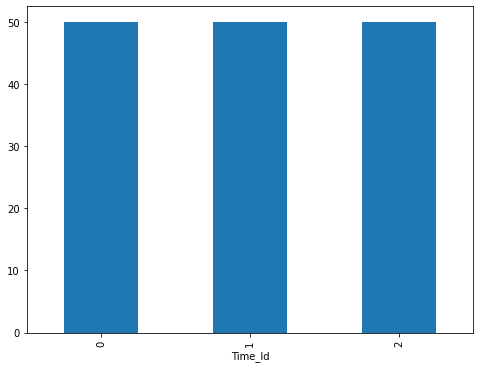

In [18]:
fig = plt.figure(figsize=(8,6))
df.groupby('Time_Id').Article_Text.count().plot.bar(ylim=0)
plt.show()

In [19]:
Article_Text = df['Article_Text']

In [20]:
len(Article_Text)

150

In [21]:
type(Article_Text)

pandas.core.series.Series

In [22]:
lengths = pd.Series([len(x) for x in Article_Text])

In [23]:
lengths

0      691 
1      1950
2      771 
3      338 
4      862 
      ...  
145    282 
146    389 
147    297 
148    555 
149    689 
Length: 150, dtype: int64

In [24]:
trace1 = go.Histogram(x=lengths, opacity=0.85, name="Word Count", marker=dict(color='rgba(26.7, 42.4, 81.2)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Article Length',
                   xaxis=dict(title='Word Count'),
                   yaxis=dict( title='Frequency'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [25]:
trace1 = go.Histogram(x=df['dale_chall_score'], opacity=0.85, name="Word Count", marker=dict(color='rgba(26.7, 42.4, 81.2)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Readibility Scores',
                   xaxis=dict(title='Dale_Chall_Scores'),
                   yaxis=dict( title='Frequency'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [26]:
trace1 = go.Histogram(x=df['polarity'], opacity=0.85, name="Word Count", marker=dict(color='rgba(26.7, 42.4, 81.2)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Polarity',
                   xaxis=dict(title='Polarity Score'),
                   yaxis=dict( title='Frequency'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [27]:
lengths.describe()

count    150.00000  
mean     942.58000  
std      1422.67256 
min      25.00000   
25%      390.25000  
50%      618.00000  
75%      1223.50000 
max      15975.00000
dtype: float64

In [28]:
df['dale_chall_score'].describe()

count    150.000000
mean     8.995267  
std      1.194367  
min      6.110000  
25%      8.310000  
50%      8.750000  
75%      9.370000  
max      13.940000 
Name: dale_chall_score, dtype: float64

In [29]:
df['polarity'].describe()

count    150.000000
mean     0.090248  
std      0.072160  
min     -0.057139  
25%      0.053914  
50%      0.084853  
75%      0.127073  
max      0.600000  
Name: polarity, dtype: float64

In [30]:
y0 = df.loc[df['Time_Id'] == 0]['polarity']
y1 = df.loc[df['Time_Id'] == 1]['polarity']
y2 = df.loc[df['Time_Id'] == 2]['polarity']

trace0 = go.Box(
    y=y0,
    name = 'Less than Two Weeks',
    marker = dict(
        color = 'rgb(255, 12, 0)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Two to Four Weeks',
    marker = dict(
        color = 'rgb(0, 150, 150)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Five to Six Weeks',
    marker = dict(
        color = 'rgb(10, 140, 255)',
    )
)

data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Sentiment Polarity by Timeframe"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity by Timeframe")


In [31]:
y0 = df.loc[df['Time_Id'] == 0]['dale_chall_score']
y1 = df.loc[df['Time_Id'] == 1]['dale_chall_score']
y2 = df.loc[df['Time_Id'] == 2]['dale_chall_score']

trace0 = go.Box(
    y=y0,
    name = 'Less than Two Weeks',
    marker = dict(
        color = 'rgb(255, 12, 0)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Two to Four Weeks',
    marker = dict(
        color = 'rgb(0, 150, 150)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Five to Six Weeks',
    marker = dict(
        color = 'rgb(10, 140, 255)',
    )
)

data = [trace0, trace1, trace2]
layout = go.Layout(
    title = "Readibility by Timeframe"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Readibility by Timeframe")

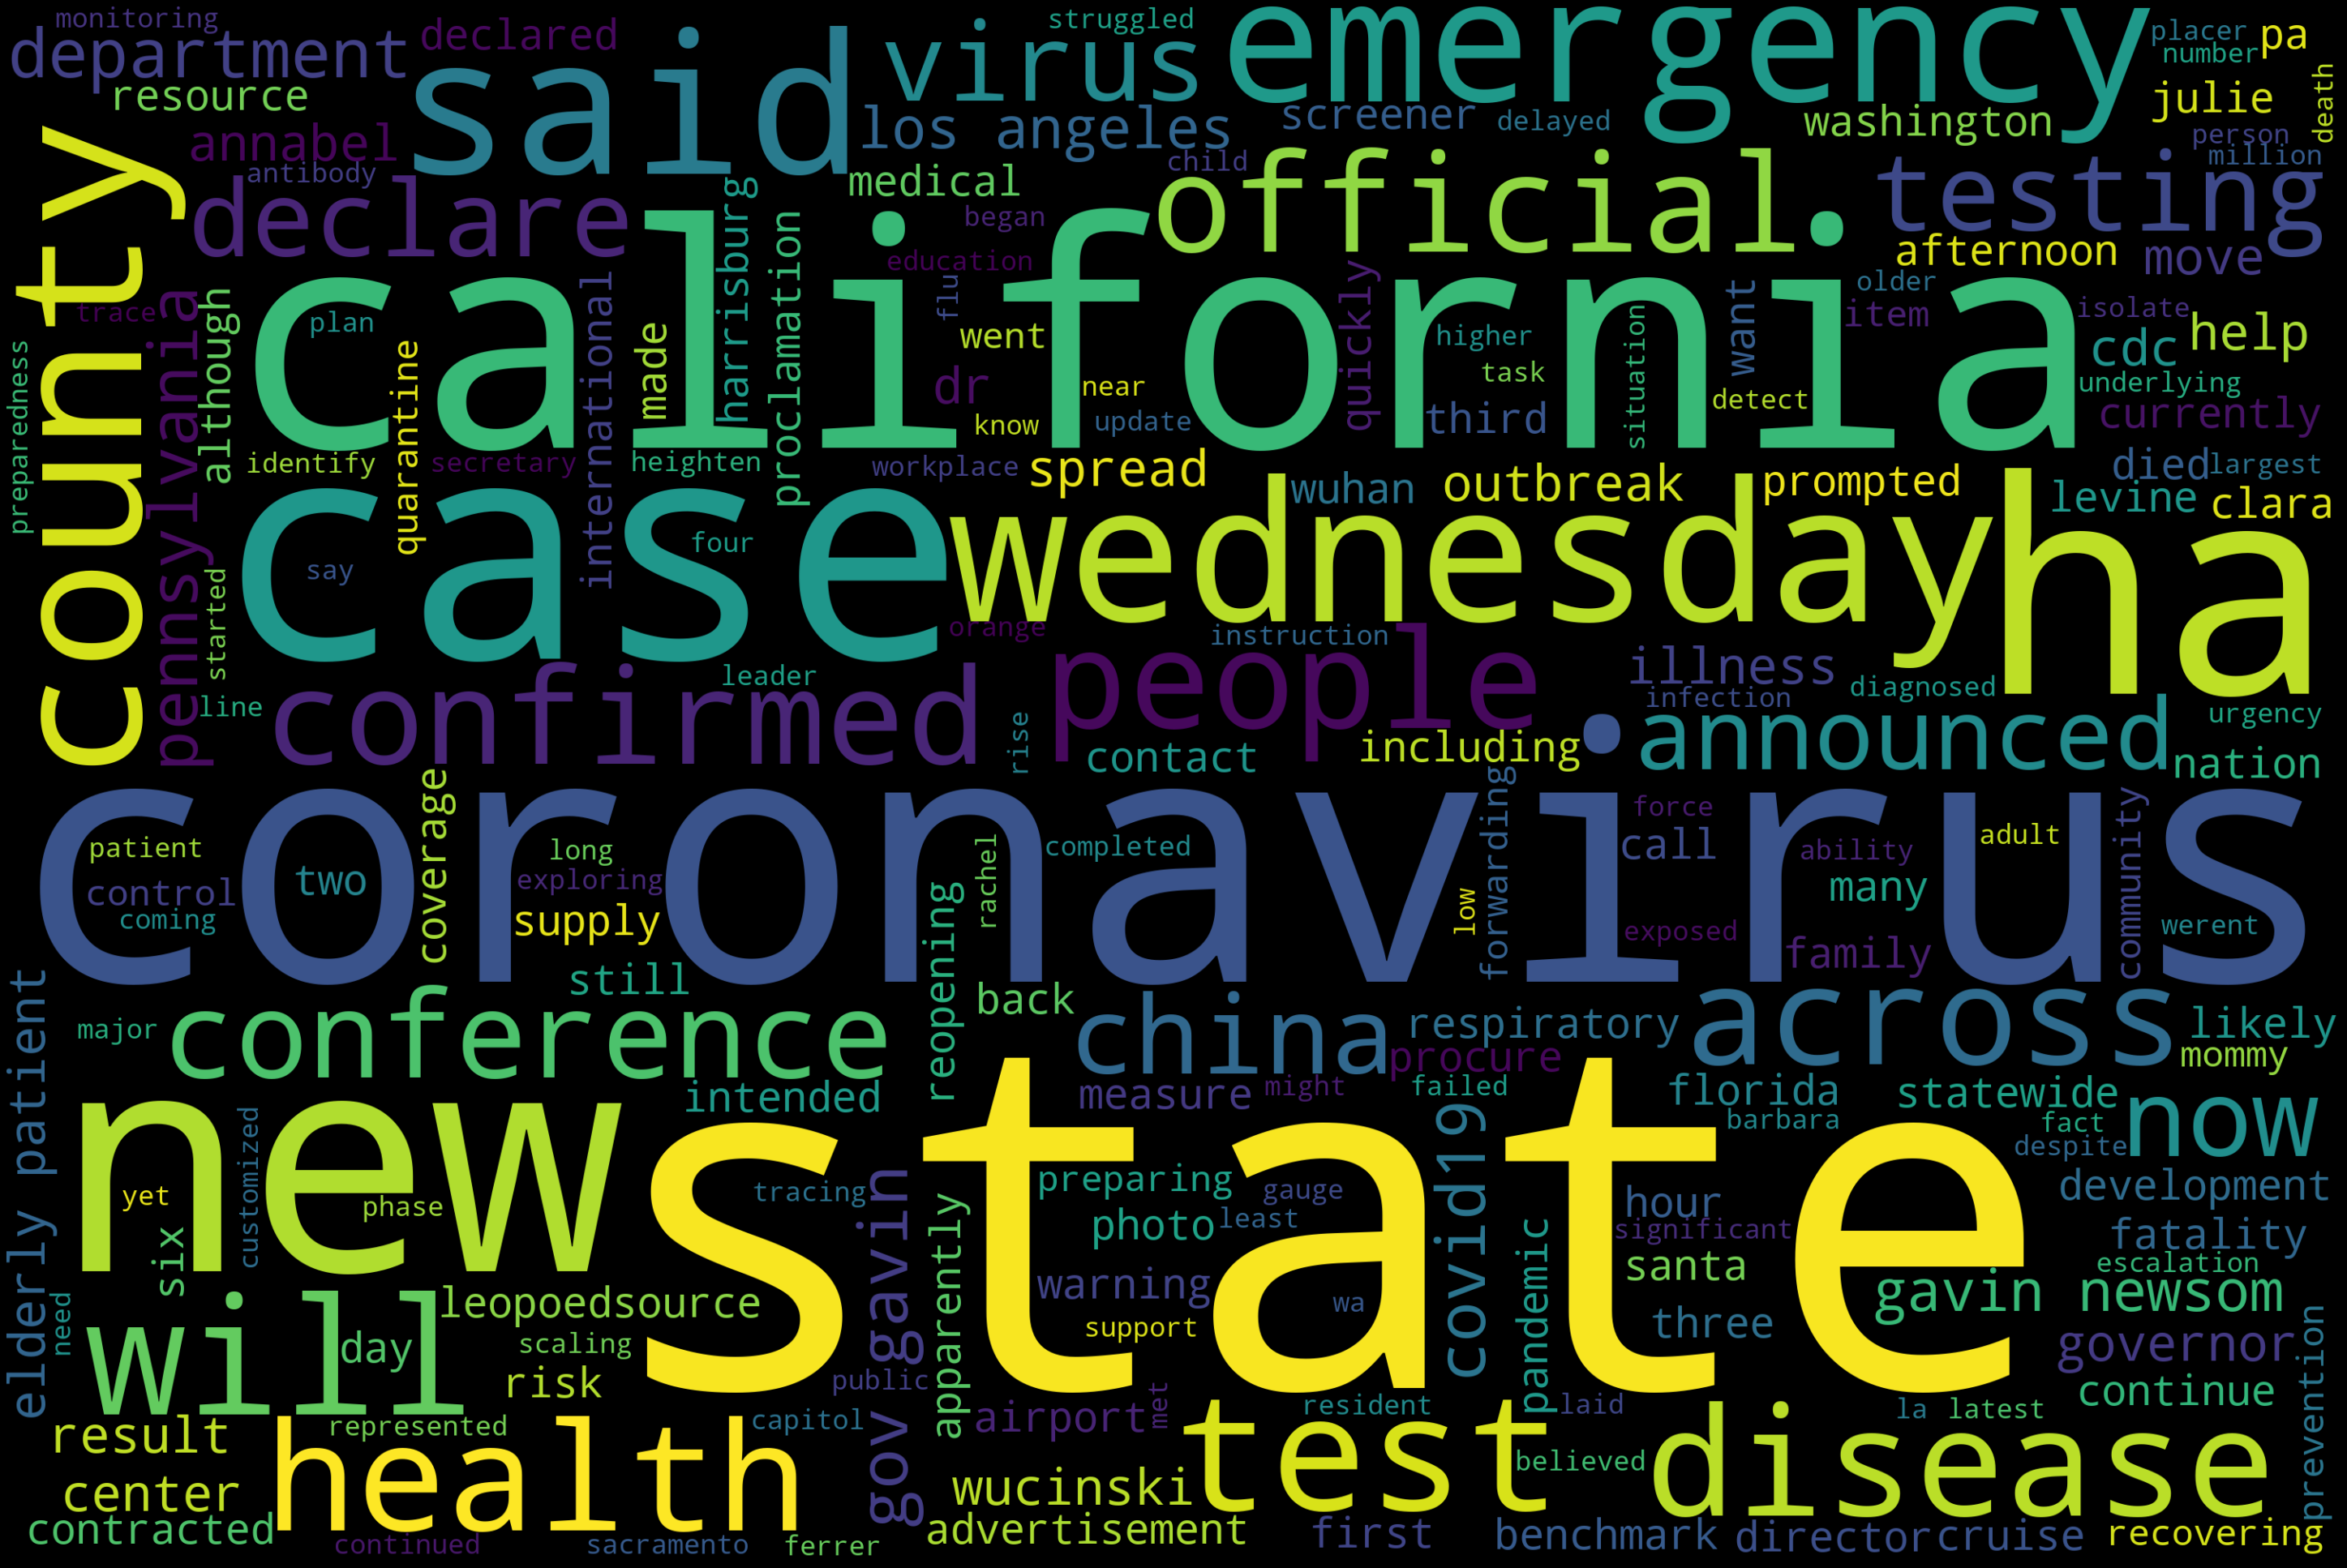

In [32]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(Article_Text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
df['Article_Text']=[" ".join(Article_Text) for Article_Text in df['Article_Text'].values]

In [34]:
blob = TextBlob(str(df['Article_Text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:10]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
title='Top 10 Part-of-speech Tags')

## Feature Selection

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Article_Text).toarray()
labels = df.Time_Id
features.shape

(150, 2990)

In [36]:
from sklearn.feature_selection import chi2
import numpy as np

N = 6
for Time_Until_Order, Time_Id in sorted(Time_Until_Order_to_id.items()):
  features_chi2 = chi2(features, labels == Time_Id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Time_Until_Order))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Four to Six Weeks':
  . Most correlated unigrams:
       . base
       . chinatown
       . miramar
       . rivkees
       . evacuee
       . diego
  . Most correlated bigrams:
       . corp air
       . marine corp
       . station miramar
       . military base
       . air station
       . san diego
# 'Less than Two Weeks':
  . Most correlated unigrams:
       . china
       . job
       . beach
       . order
       . placer
       . stayathome
  . Most correlated bigrams:
       . palm beach
       . los angeles
       . angeles county
       . testing site
       . placer county
       . stayathome order
# 'Two to Four Weeks':
  . Most correlated unigrams:
       . isolated
       . matagorda
       . iran
       . orlando
       . solano
       . canceled
  . Most correlated bigrams:
       . matagorda county
       . uc davis
       . davis medical
       . isolated home
       . patient ha
       . solano county


## Modeling

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

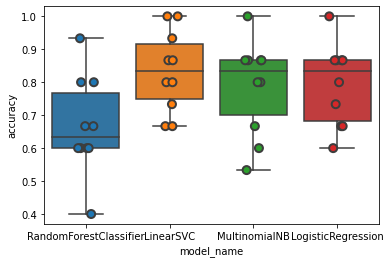

In [38]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [39]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.833333
LogisticRegression        0.793333
MultinomialNB             0.786667
RandomForestClassifier    0.666667
Name: accuracy, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

model = LinearSVC()                 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.3
                                                                                 ,random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

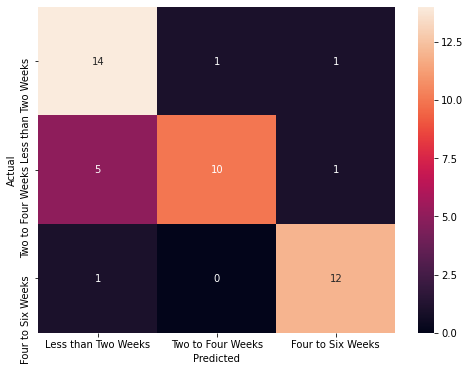

In [41]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=Time_Id_df.Time_Until_Order.values, yticklabels=Time_Id_df.Time_Until_Order.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [42]:
from IPython.display import display

for predicted in Time_Id_df.Time_Id:
  for actual in Time_Id_df.Time_Id:
    if predicted != actual and conf_mat[actual, predicted] >= 1:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Article_Title','Time_Until_Order']])
      print('')

'Two to Four Weeks' predicted as 'Less than Two Weeks' : 5 examples.


,Article_Title,Time_Until_Order
40,Coronavirus in New York: The Latest,Two to Four Weeks
71,DATA: 15% of all COVID-19 deaths in Texas have been reported in the past week,Two to Four Weeks
73,Coronavirus in Texas 3/17: Feds consider sending people economic stimulus checks; state has more than 70 known cases,Two to Four Weeks
78,"Texas Reports 1st Coronavirus Death, Patient May Be Linked To 2nd Case",Two to Four Weeks
18,33 Known Cases Of Coronavirus In California,Two to Four Weeks



'Four to Six Weeks' predicted as 'Less than Two Weeks' : 1 examples.


,Article_Title,Time_Until_Order
86,"Texas police say local meth is contaminated with coronavirus, offer to test it",Four to Six Weeks



'Less than Two Weeks' predicted as 'Two to Four Weeks' : 1 examples.


,Article_Title,Time_Until_Order
127,"Coronavirus updates: Pa. has 3,394 cases, Wolf requests 'major disaster area’ declaration",Less than Two Weeks



'Less than Two Weeks' predicted as 'Four to Six Weeks' : 1 examples.


,Article_Title,Time_Until_Order
62,Track Texas coronavirus cases by county with this interactive map,Less than Two Weeks



'Two to Four Weeks' predicted as 'Four to Six Weeks' : 1 examples.


,Article_Title,Time_Until_Order
44,Coronavirus is coming. Is New York ready?,Two to Four Weeks


In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Time_Until_Order'].unique()))

                     precision    recall  f1-score   support

Less than Two Weeks       0.70      0.88      0.78        16
  Two to Four Weeks       0.91      0.62      0.74        16
  Four to Six Weeks       0.86      0.92      0.89        13

           accuracy                           0.80        45
          macro avg       0.82      0.81      0.80        45
       weighted avg       0.82      0.80      0.80        45



## Conclusion

The model was accurate in predicting stay-at-home orders, but I feel that it needs more training to prove it can maintain its performance. To further test, would include more results from each state, or include articles from a different time surrounding a different stay-at-home orders. 